In [6]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Cargar dataset
df = pd.read_csv("comentarios_deportivos.csv")

# Asegurar que los comentarios sean texto
df['comentario'] = df['comentario'].astype(str)

# Vista rápida
df

,id,comentario,sentimiento
0,180,"Partido equilibrado, resultado justo.",Neutral
1,177,"Encuentro equilibrado, reparto justo de puntos.",Neutral
2,189,Resultado esperado dadas las circunstancias.,Neutral
3,132,Nuestro ataque no generó peligro suficiente.,Negativo
4,148,"Sin sobresaltos, rendimiento promedio.",Neutral
...,...,...,...
195,124,Errores constantes en pases y posesión.,Negativo
196,185,Rendimiento estable en defensa y ataque.,Neutral
197,13,Controlamos claramente el ritmo del partido.,Positivo
198,90,El equipo pareció desorganizado en todo momento.,Negativo


In [3]:
# Función simple y efectiva para limpiar texto
def limpiar_texto_simple(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", "", texto)  # Solo letras y espacios
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto

# Aplicar limpieza
df['comentario_limpio'] = df['comentario'].apply(limpiar_texto_simple)

# Revisar ejemplos
df[['comentario', 'comentario_limpio']].sample(10)

,comentario,comentario_limpio
55,La estrategia funcionó perfectamente.,la estrategia funcionó perfectamente
69,"Actuación normal, nada destacable.",actuación normal nada destacable
27,Controlamos claramente el ritmo del partido.,controlamos claramente el ritmo del partido
49,Rendimiento estable en defensa y ataque.,rendimiento estable en defensa y ataque
57,Jugamos acorde a nuestro nivel habitual.,jugamos acorde a nuestro nivel habitual
110,La defensa estuvo impecable hoy.,la defensa estuvo impecable hoy
62,"Partido equilibrado, resultado justo.",partido equilibrado resultado justo
99,Nuestro delantero marcó un gol espectacular.,nuestro delantero marcó un gol espectacular
85,"Partido equilibrado, resultado justo.",partido equilibrado resultado justo
150,La defensa estuvo muy débil.,la defensa estuvo muy débil


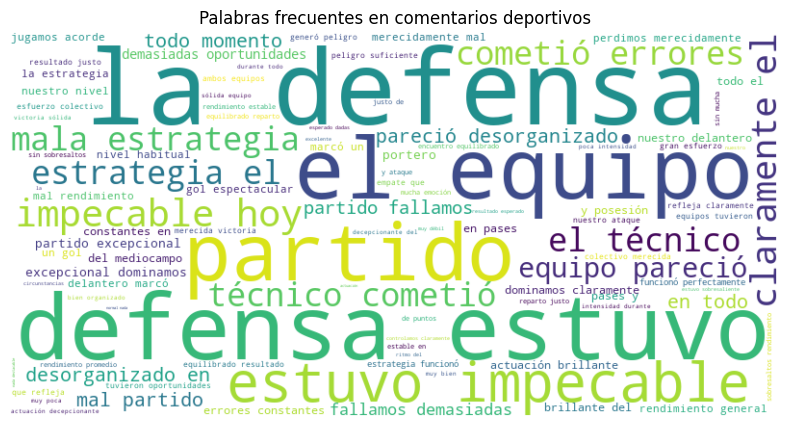

In [4]:
# Filtrar comentarios útiles
df_filtrado = df[df['comentario_limpio'].str.strip().astype(bool)]

# Unir todos los comentarios limpios
texto_total = ' '.join(df_filtrado['comentario_limpio'])

# Generar nube
if texto_total:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Palabras frecuentes en comentarios deportivos")
    plt.show()
else:
    print("⚠️ No hay palabras útiles después del preprocesamiento.")

C:\Users\xioma\AppData\Local\Temp\ipykernel_13128\55402655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimiento', data=df, palette='viridis')


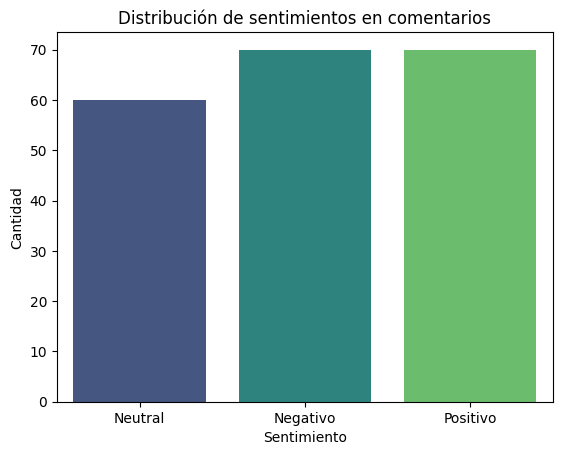

In [7]:
# Verificar columna
if 'sentimiento' in df.columns:
    sns.countplot(x='sentimiento', data=df, palette='viridis')
    plt.title('Distribución de sentimientos en comentarios')
    plt.xlabel('Sentimiento')
    plt.ylabel('Cantidad')
    plt.show()
else:
    print("⚠️ No se encontró la columna 'sentimiento'.")

In [10]:
sentimiento_widget = widgets.Dropdown(options=df['sentimiento'].unique(), description='Sentimiento:')

def mostrar_comentarios(sentimiento):
    seleccionados = df[df['sentimiento'] == sentimiento]
    display(seleccionados[['comentario', 'comentario_limpio']].sample(5))

widgets.interactive(mostrar_comentarios, sentimiento=sentimiento_widget)

interactive(children=(Dropdown(description='Sentimiento:', options=('Neutral', 'Negativo', 'Positivo'), value=…